In [1]:
library(tidyverse)
library(tseries)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
segments = read.csv('data_formatted/segments.csv')

In [3]:
pd5.tango <- segments %>% filter(id == 'pddance005') %>% filter(dance == 'tango')

In [4]:
# Selects time + col, ffills col
select_fill <- function(data, col){
    time_ <- data %>% select('time',col)
    time_[col] <- time_ %>% select(all_of(col)) %>% fill() %>% pull(col)
    return(time_)
}

In [5]:
time_x <- select_fill(pd5.tango, 'segments.pelvis.acceleration.x_.mg.')
time_y <- select_fill(pd5.tango, 'segments.pelvis.acceleration.y_.mg.')
time_z <- select_fill(pd5.tango, 'segments.pelvis.acceleration.z_.mg.')

Note: Using an external vector in selections is ambiguous.
ℹ Use `all_of(col)` instead of `col` to silence this message.
ℹ See <https://tidyselect.r-lib.org/reference/faq-external-vector.html>.
This message is displayed once per session.



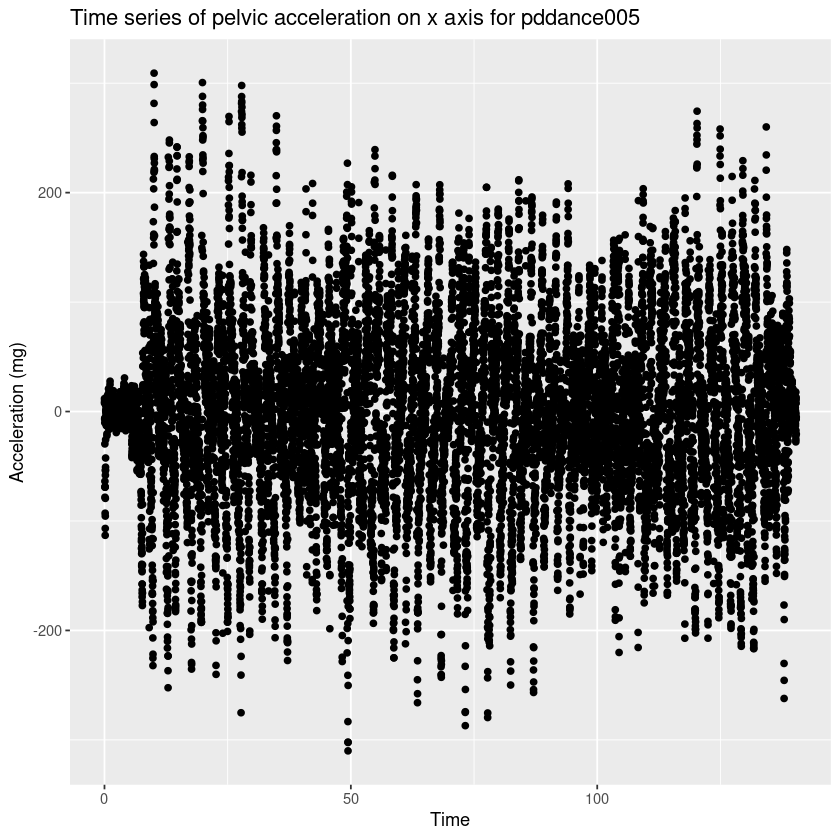

In [6]:
time_x %>%
    ggplot(aes(x=time, y = segments.pelvis.acceleration.x_.mg.)) +
    geom_point() +
    labs(x='Time',
         y='Acceleration (mg)',          
         title='Time series of pelvic acceleration on x axis for pddance005')